****                        Video Game sales Analysis with different ML and Ensemble Modeling****


Import different python modules

In [1]:
import numpy as np
import pandas as pd 
import pandas as pd 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# dataset is available in the "../dataset/" directory.

from subprocess import check_output
print(check_output(["ls", "../dataset"]).decode("utf8"))


vgsales.csv



In [2]:
df=pd.read_csv("../dataset/vgsales.csv")

In [3]:
df.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


In [4]:
df.isnull().sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

**Check null value and fillup missing values**

In [5]:
#df=df.fillna(0)

df = df.dropna()

In [6]:
df.Year.value_counts()

2009.0    1431
2008.0    1428
2010.0    1257
2007.0    1201
2011.0    1136
2006.0    1008
2005.0     936
2002.0     829
2003.0     775
2004.0     744
2012.0     655
2015.0     614
2014.0     580
2013.0     546
2001.0     482
1998.0     379
2000.0     349
2016.0     342
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1983.0      17
1989.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
2017.0       3
2020.0       1
Name: Year, dtype: int64

**EDA and DATA Analysis with different plotting**

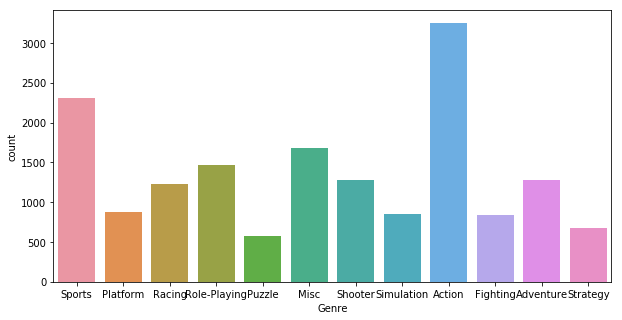

In [7]:
plt.figure(figsize=(10,5))
sns.countplot(df['Genre'])

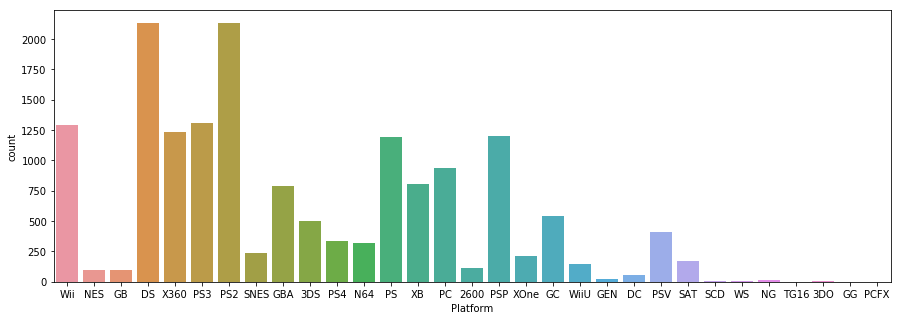

In [8]:
plt.figure(figsize=(15,5))
sns.countplot(df['Platform'])

In [9]:
platGenre = pd.crosstab(df.Platform,df.Genre)
platGenre.head(5)

Genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
Platform,,,,,,,,,,,,
2600,55,1,1,5,9,8,4,0,22,1,10,0
3DO,0,1,0,0,0,1,0,0,0,1,0,0
3DS,180,36,14,53,28,19,10,85,6,28,25,15
DC,3,11,12,0,2,0,6,4,3,1,10,0
DS,335,238,36,389,89,236,66,196,42,280,146,78


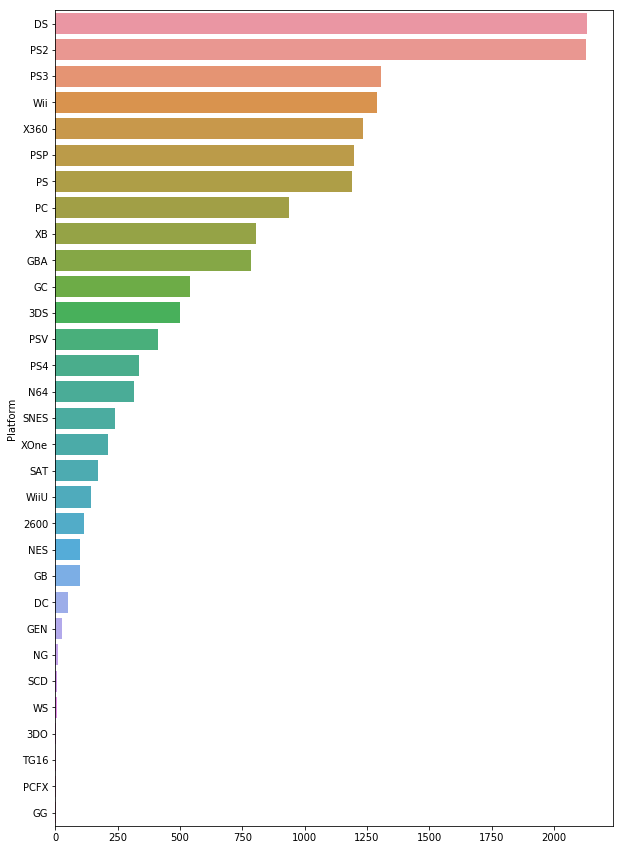

In [10]:
platGenreTotal =platGenre.sum(axis=1).sort_values(ascending = False)
plt.figure(figsize=(10,15))
sns.barplot(x=platGenreTotal.values,y=platGenreTotal.index)

So You can see DS and PS2 have the most games in their platform and now, we can see the detail of genre of game in platform that have more than 1000 games. In the seaborn, it is easy to use heatrmap rather than the stacked bar, so we can use the heatmap to have a try.

In [11]:
df.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82


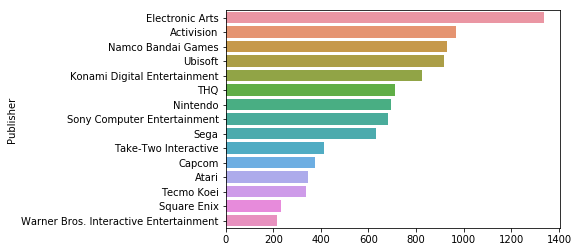

In [12]:
pub=df.groupby('Publisher')['Publisher'].count().sort_values(ascending = False).head(15)
sns.barplot(x=pub.values,y=pub.index)

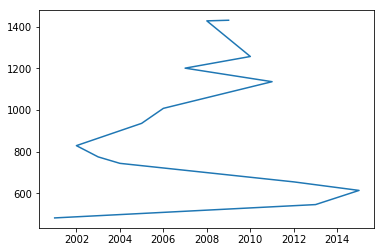

In [13]:
yr=df.groupby('Year')['Year'].count().sort_values(ascending = False).head(15)
plt.plot(yr)

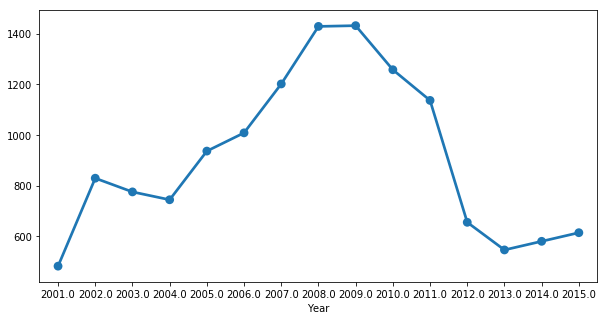

In [14]:
plt.figure(figsize=(10,5))
sns.pointplot(x=yr.index ,y=yr.values)

So it is showing most important year is 2009 based on others year

convert Categorical variable to numerical Variables

In [15]:
from sklearn import model_selection, preprocessing
for c in df.columns:
    if df[c].dtype == 'object':
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(df[c].values)) 
        df[c] = lbl.transform(list(df[c].values))
        #x_train.drop(c,axis=1,inplace=True)

In [16]:
df.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,10849,26,2006.0,10,359,41.49,29.02,3.77,8.46,82.74
1,2,9201,11,1985.0,4,359,29.08,3.58,6.81,0.77,40.24
2,3,5493,26,2008.0,6,359,15.85,12.88,3.79,3.31,35.82


Text(0.5, 1.0, 'Heatmap of Correlation Matrix')

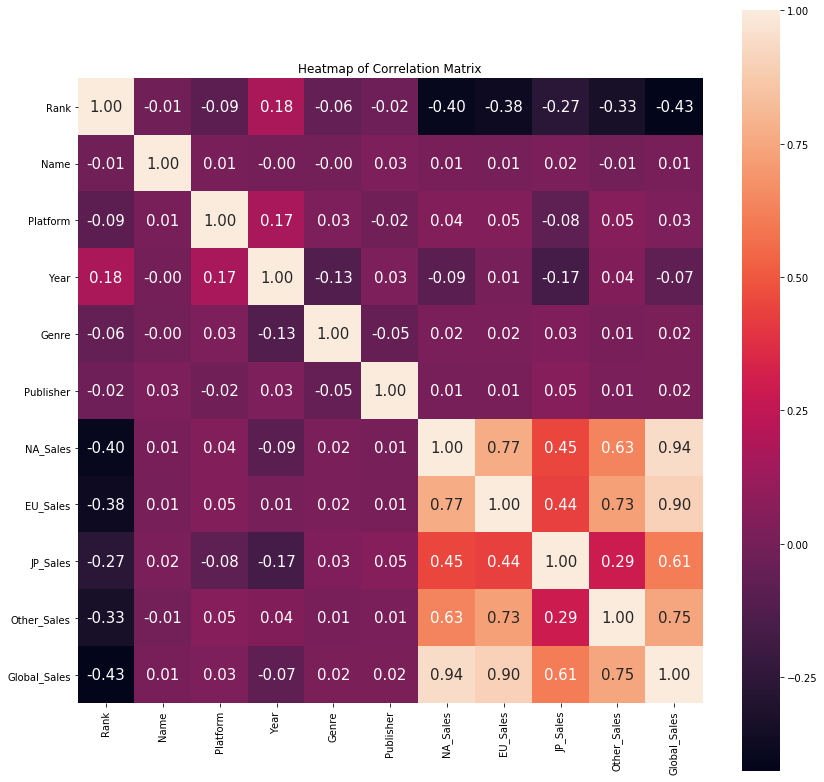

In [20]:
corr=df.corr()
corr = (corr)
plt.figure(figsize=(14,14))
ax = sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws=

{'size': 15},
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
ax.set_title('Heatmap of Correlation Matrix')

so all sales are highly correlated with global sales which is very true..Rank is not showing highly correlated with global sales as this is shown in Matrix formation.

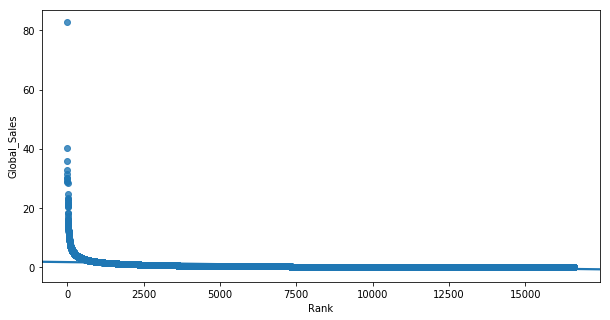

In [21]:
plt.figure(figsize=(10,5))
sns.regplot(x='Rank',y='Global_Sales',data=df)

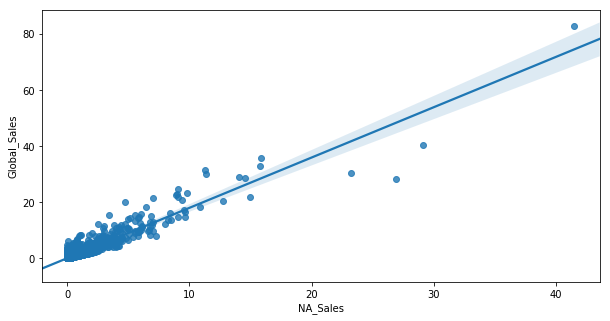

In [22]:
plt.figure(figsize=(10,5))
sns.regplot(x='NA_Sales',y='Global_Sales',data=df)

In [23]:
df.head(3)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,10849,26,2006.0,10,359,41.49,29.02,3.77,8.46,82.74
1,2,9201,11,1985.0,4,359,29.08,3.58,6.81,0.77,40.24
2,3,5493,26,2008.0,6,359,15.85,12.88,3.79,3.31,35.82


In [24]:
df.dtypes

Rank              int64
Name              int64
Platform          int64
Year            float64
Genre             int64
Publisher         int64
NA_Sales        float64
EU_Sales        float64
JP_Sales        float64
Other_Sales     float64
Global_Sales    float64
dtype: object

Split test and train dataset randomly

In [25]:
#Train-Test split
from sklearn.model_selection import train_test_split
label = df.pop('Global_Sales')
data_train, data_test, label_train, label_test = train_test_split(df, label, test_size = 0.2, random_state = 200)

In [26]:
data_train.shape,data_test.shape

((13032, 10), (3259, 10))

**Start with Extream gradient boosting**

In [28]:
import xgboost as xgb
from sklearn.model_selection import KFold, train_test_split, GridSearchCV

In [29]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 5,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'eval_metric': 'rmse',
    'silent': 1
}

In [30]:
dtrain = xgb.DMatrix(data_train, label_train)

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


In [ ]:
cv_output = xgb.cv(xgb_params, dtrain, num_boost_round=1000, early_stopping_rounds=20,
    verbose_eval=50, show_stdv=False)

[0]	train-rmse:1.4859	test-rmse:1.46788
[50]	train-rmse:0.295463	test-rmse:0.457891
[100]	train-rmse:0.100963	test-rmse:0.359373
[150]	train-rmse:0.0437733	test-rmse:0.337961
[200]	train-rmse:0.0238513	test-rmse:0.330495
[250]	train-rmse:0.016814	test-rmse:0.327279
[300]	train-rmse:0.0135727	test-rmse:0.326091
[350]	train-rmse:0.0114917	test-rmse:0.325681
[400]	train-rmse:0.010053	test-rmse:0.32543


In [ ]:
num_boost_rounds = len(cv_output)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round= num_boost_rounds)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 13))
xgb.plot_importance(model, max_num_features=50, height=0.5, ax=ax)

**Company overall Rank is very important .This has been shown here.Most of the trees gives vote to this attribute.**

In [ ]:
dtest=xgb.DMatrix(data_test)

In [ ]:
y_predict = model.predict(dtest)
out = pd.DataFrame({'Actual_Global_Sales': label_test, 'predict_Global_Sales': y_predict,'Diff' :(label_test-y_predict)})
out[['Actual_Global_Sales','predict_Global_Sales','Diff']].head(5)

XGBOOST output seems very good with 97% accuracy

In [ ]:
sns.regplot(out['predict_Global_Sales'],out['Diff'])

In [ ]:
sns.regplot(out['Actual_Global_Sales'],out['Diff'])

In [ ]:
data_train.head(3)

As we already saw that all sales data are highly attached with global sales .Then consider only sales data to predict Global sales.

In [ ]:
lr_data_train=data_train[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
lr_data_test=data_test[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']]
lr_label_train=label_train
lr_label_test=label_test

In [ ]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(lr_data_train, lr_label_train)
lr_score_train = lr.score(lr_data_train, lr_label_train)
print("Training score: ",lr_score_train)
lr_score_test = lr.score(lr_data_test, lr_label_test)
print("Testing score: ",lr_score_test)

WOW accuracy improved to 99% !!!!!!!!!!!!

In [ ]:
y_pre = lr.predict(lr_data_test)

In [ ]:
out_lr = pd.DataFrame({'Actual_Global_Sales': lr_label_test, 'Predict_Global_Sales': y_pre,'Diff' :(lr_label_test-y_pre)})
out_lr[['Actual_Global_Sales','Predict_Global_Sales','Diff']].head(5)

In [ ]:
out_lr.shape

In [ ]:
sns.regplot(out_lr['Predict_Global_Sales'],out_lr['Diff'])

Lets consider Ensemble modeling ..........
**XGBOOST + Linear Regressor >>Lesso Regressor>Output**

In [ ]:
#Ensemble XGBOOST & LINEAR REGRESSOR for train data
en_dtest=xgb.DMatrix(data_train)
y_xgb_pred = model.predict(en_dtest)

y_lr_pred = lr.predict(lr_data_train)

Ensemble=pd.DataFrame({'XGBOOST':y_xgb_pred ,'LINEAR_REG':y_lr_pred ,'GLOBAL_SALES':lr_label_train})


In [ ]:
Ensemble.head(5)

In [ ]:
corr=Ensemble.corr()
corr = (corr)
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
sns.plt.title('Heatmap of Correlation Matrix')

In [ ]:
#Ensemble XGBOOST & LINEAR REGRESSOR for test data
en_dtest_1=xgb.DMatrix(data_test)
y_xgb_pred_1 = model.predict(en_dtest_1)

y_lr_pred_1 = lr.predict(lr_data_test)

Ensemble_test_with_actual=pd.DataFrame({'XGBOOST':y_xgb_pred_1 ,'LINEAR_REG':y_lr_pred_1,'ACTUAL_SALES':lr_label_test})

In [ ]:
Ensemble_test=Ensemble_test_with_actual[['XGBOOST','LINEAR_REG']]

In [ ]:
Ensemble_test.shape,Ensemble.shape

In [ ]:
Ensemble_test.head(3)

In [ ]:
#Train-Test split
from sklearn.model_selection import train_test_split
label = Ensemble.pop('GLOBAL_SALES')
X_train, X_test, Y_train, Y_test = train_test_split(Ensemble, label, test_size = 0.3, random_state = 200)

we used lesso as 2 attribute is highly correlated...means xgboost output and linear regressor output...U can try different model also

In [ ]:
from sklearn import linear_model
clf = linear_model.Lasso(alpha=1e-4)
clf.fit(X_train,Y_train)
tr_scr=clf.score(X_train,Y_train)
print("Training score: ",tr_scr)
ts_scr=clf.score(X_test,Y_test)
print("Testing score: ",ts_scr)


In [ ]:
ensm_prd=clf.predict(Ensemble_test)

In [ ]:
lr_label_test.shape

In [ ]:
Output=pd.DataFrame({'LINEAR_REGRASSOR':Ensemble_test['LINEAR_REG'],'XGBOOST':Ensemble_test['XGBOOST'],'ENSEMBLE':ensm_prd,'ACTUAL_PRICE':Ensemble_test_with_actual['ACTUAL_SALES']})

In [ ]:
Output.head(10)